# Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Mordred 2D



## Reading Datasets

### I will start by importing the fda approved dataset with descriptors, and the pdb dataset with descriptors

In [2]:
PATH = "../../../../../../masters_data"

In [3]:
fda_approved = pd.read_csv(f"{PATH}/positive_datasets/fda_approved_mordred_2d.csv", low_memory=False)
print(fda_approved.shape)
fda_approved.head()

(1895, 1628)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,6.188264,24.179697,59.048347,6.560927,9,0,12.0,9.0,3.111111,1.000000
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,6.834109,27.254130,75.032028,7.503203,18,2,16.0,14.0,3.361111,1.333333
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,6.834109,27.254130,76.027277,8.447475,18,2,16.0,14.0,3.361111,1.333333
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,5.509388,22.328143,77.029920,7.002720,10,1,10.0,8.0,2.500000,1.250000
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,6.188264,24.179697,78.013936,7.801394,9,0,12.0,9.0,3.111111,1.000000


In [4]:
pdb = pd.read_csv(f"{PATH}/negative_datasets/pdb_mordred_2d.csv", low_memory=False)
print(pdb.shape)
pdb.head()

(12246, 1615)


,clean_smiles,ROMol,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,CC1(C)O[C@H]2[C@@H]3OS(=O)(=O)O[C@@H]3CO[C@@]2...,<rdkit.Chem.rdchem.Mol object at 0x7f900c685eb0>,17.940503,15.438349,0,0,25.870587519755496,2.6106673657802717,5.045479690641752,25.870587519755496,...,10.396628,73.749348,361.013738,9.757128,948,35,130.0,154.0,9.583333,4.222222
1,CNC(=O)c1cccc(C)c1Nc1nc(N2CCN(c3ccccc3Cl)CC2)n...,<rdkit.Chem.rdchem.Mol object at 0x7f900c685cf0>,34.124113,25.848212,0,0,57.57582775168476,2.4615092490485297,4.900216327397796,57.57582775168476,...,10.682973,95.203853,640.209548,8.314410,7108,73,230.0,272.0,14.166667,9.833333
2,CCNC(=O)Nc1cc2c(-c3ccnc(C)c3)ccc(C)c2cn1,<rdkit.Chem.rdchem.Mol object at 0x7f900c685ba0>,18.551185,14.662531,0,0,30.407037312979,2.46696286852779,4.933925737055578,30.407037312979,...,10.097120,58.572801,320.163711,7.276448,1342,38,124.0,145.0,7.888889,5.361111
3,Clc1ccccc1Nc1ccnc(Nc2ccc(-c3nnn[nH]3)cc2)n1,<rdkit.Chem.rdchem.Mol object at 0x7f900c685d60>,20.534606,15.143917,2,0,34.709820028470304,2.348407012232265,4.683189203175339,34.709820028470304,...,10.021226,73.874481,364.095170,9.335774,1938,36,136.0,157.0,6.277778,5.722222
4,CC1=C(CCC(=O)O)c2cc3[nH]c(cc4nc(cc5[nH]c(cc1n2...,<rdkit.Chem.rdchem.Mol object at 0x7f900c685e40>,36.575469,27.294344,4,0,55.26315328576521,2.5471136971911394,4.897978275802004,55.26315328576521,...,10.895646,102.672409,670.140335,8.817636,6789,82,256.0,308.0,19.125000,9.500000


### Now I'll separate the calculated descriptors and the other columns in the datasets

In [5]:
# saving only the calculated descriptors

flag_columns = [
    "name",
    "chembl_id",
    "clean_smiles",
    "first_approval_year",
    "indication_class",
    "molecule_type",
    "withdrawn_flag",
    "therapeutic_flag",
    "polymer_flag",
    "inorganic_flag",
    "natural_product_flag",
    "parenteral",
    "topical",
    "oral",
    "ROMol",
]

fda_approved_features = fda_approved.drop(labels=flag_columns, axis=1)

print(fda_approved_features.shape)
fda_approved_features.head()

(1895, 1613)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,2.449490,2.449490,0,3,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,59.048347,6.560927,9,0,12.0,9.0,3.111111,1.000000
1,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,75.032028,7.503203,18,2,16.0,14.0,3.361111,1.333333
2,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,76.027277,8.447475,18,2,16.0,14.0,3.361111,1.333333
3,2.121320,2.340100,0,1,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,77.029920,7.002720,10,1,10.0,8.0,2.500000,1.250000
4,2.449490,2.449490,0,0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,78.013936,7.801394,9,0,12.0,9.0,3.111111,1.000000


In [6]:
# saving only the information variables (dropping ROMol)

flag_columns = [
    "name",
    "chembl_id",
    "clean_smiles",
    "first_approval_year",
    "indication_class",
    "molecule_type",
    "withdrawn_flag",
    "therapeutic_flag",
    "polymer_flag",
    "inorganic_flag",
    "natural_product_flag",
    "parenteral",
    "topical",
    "oral",
]

fda_approved_info = fda_approved[flag_columns]

print(fda_approved_info.shape)
fda_approved_info.head()

(1895, 14)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,natural_product_flag,parenteral,topical,oral
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,False,False,False,True
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,False,False,False,True
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,False,False,False,True
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,False,False,True,True
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,False,True,False,False


In [7]:
# saving only the calculated descriptors

flag_columns = [
    "clean_smiles",
    "ROMol",
]

pdb_features = pdb.drop(labels=flag_columns, axis=1)

print(pdb_features.shape)
pdb_features.head()

(12246, 1613)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,17.940503,15.438349,0,0,25.870587519755496,2.6106673657802717,5.045479690641752,25.870587519755496,1.1759357963525225,4.055191331332935,...,10.396628,73.749348,361.013738,9.757128,948,35,130.0,154.0,9.583333,4.222222
1,34.124113,25.848212,0,0,57.57582775168476,2.4615092490485297,4.900216327397796,57.57582775168476,1.3085415398110174,4.7077939736304035,...,10.682973,95.203853,640.209548,8.314410,7108,73,230.0,272.0,14.166667,9.833333
2,18.551185,14.662531,0,0,30.407037312979,2.46696286852779,4.933925737055578,30.407037312979,1.2669598880407917,4.103196378002474,...,10.097120,58.572801,320.163711,7.276448,1342,38,124.0,145.0,7.888889,5.361111
3,20.534606,15.143917,2,0,34.709820028470304,2.348407012232265,4.683189203175339,34.709820028470304,1.3349930780180885,4.196462182267038,...,10.021226,73.874481,364.095170,9.335774,1938,36,136.0,157.0,6.277778,5.722222
4,36.575469,27.294344,4,0,55.26315328576521,2.5471136971911394,4.897978275802004,55.26315328576521,1.2013728975166351,4.767289411135039,...,10.895646,102.672409,670.140335,8.817636,6789,82,256.0,308.0,19.125000,9.500000


In [8]:
# saving only the information variables (dropping ROMol)

flag_columns = [
    "clean_smiles"
]

pdb_info = pdb[flag_columns]

print(pdb_info.shape)
pdb_info.head()

(12246, 1)


,clean_smiles
0,CC1(C)O[C@H]2[C@@H]3OS(=O)(=O)O[C@@H]3CO[C@@]2...
1,CNC(=O)c1cccc(C)c1Nc1nc(N2CCN(c3ccccc3Cl)CC2)n...
2,CCNC(=O)Nc1cc2c(-c3ccnc(C)c3)ccc(C)c2cn1
3,Clc1ccccc1Nc1ccnc(Nc2ccc(-c3nnn[nH]3)cc2)n1
4,CC1=C(CCC(=O)O)c2cc3[nH]c(cc4nc(cc5[nH]c(cc1n2...


### Now I'll merge them in one dataset

In [9]:
# merging calculated descriptors

molecules_features = pd.concat([fda_approved_features, pdb_features], axis=0)
print(molecules_features.shape)
molecules_features.head()

(14141, 1613)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,2.449490,2.449490,0,3,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,59.048347,6.560927,9,0,12.0,9.0,3.111111,1.000000
1,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.04525,2.408576,...,6.834109,27.254130,75.032028,7.503203,18,2,16.0,14.0,3.361111,1.333333
2,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.04525,2.408576,...,6.834109,27.254130,76.027277,8.447475,18,2,16.0,14.0,3.361111,1.333333
3,2.121320,2.340100,0,1,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,77.029920,7.002720,10,1,10.0,8.0,2.500000,1.250000
4,2.449490,2.449490,0,0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,78.013936,7.801394,9,0,12.0,9.0,3.111111,1.000000


In [10]:
# merging molecules info

molecules_info = pd.concat([fda_approved_info, pdb_info], axis=0)
print(molecules_info.shape)
molecules_info.head()

(14141, 14)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,natural_product_flag,parenteral,topical,oral
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,False,False,False,True
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,False,False,False,True
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,False,False,False,True
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,False,False,True,True
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,False,True,False,False


## Checking for Non-Numeric Values

In [12]:
def display_non_numeric_values(df):
    non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

    for column in non_numeric_columns:
        unique_values = df[column].unique()
        print(f"Column '{column}': {unique_values}")

In [13]:
display_non_numeric_values(molecules_features)

Column 'SpAbs_A': [3.4641016151377544 5.226251859505506 4.472135954999579 ...
 '50.2670345622672' '43.50858343417583' '20.388609920696577']
Column 'SpMax_A': [1.7320508075688772 1.8477590650225733 1.6180339887498942 ...
 '2.3906374114263933' '2.5093260862181963' '2.3728108640766274']
Column 'SpDiam_A': [3.4641016151377544 3.695518130045147 3.236067977499789 ...
 '4.689623403747479' '4.937863132297458' '4.745621728153257']
Column 'SpAD_A': [3.4641016151377544 5.226251859505506 4.472135954999579 ...
 '50.2670345622672' '43.50858343417583' '20.388609920696577']
Column 'SpMAD_A': [0.8660254037844386 1.0452503719011013 1.118033988749895 ...
 '1.25667586405668' '1.3184419222477526' '1.1327005511498098']
Column 'LogEE_A': [2.1780592999959434 2.408576175098029 2.155908692071148 ...
 '4.462982705863437' '4.444439294621347' '3.7793701806712816']
Column 'VE1_A': [1.9318516525781368 2.130986313697834 1.94649797893546 ...
 '4.19410868637425' '4.651670957129225' '3.631307857336838']
Column 'VE2_A': 

We can see that a lot of the non numeric are float numbers, stored as strings. Let's convert them to float, and the ones that can't be converted to float, will be converted to pd.NaN

In [14]:
def convert_non_numeric_to_nan(df):
    non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

    for column in non_numeric_columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')

In [15]:
convert_non_numeric_to_nan(molecules_features)

In [16]:
display_non_numeric_values(molecules_features)

Column 'Lipinski': [ True False]
Column 'GhoseFilter': [False  True]


We still have the columns Lipinki and Ghose Filter, that are boolean. We will drop those columns

In [17]:
bool_cols_to_drop = ["Lipinski", "GhoseFilter"]
molecules_features = molecules_features.drop(bool_cols_to_drop, axis=1)
display_non_numeric_values(molecules_features)

In [19]:
molecules_features.isna().sum().sum()

2333795

In [18]:
print(molecules_features.shape)
molecules_features.head()

(14141, 1611)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,2.449490,2.449490,0,3,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,59.048347,6.560927,9,0,12.0,9.0,3.111111,1.000000
1,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,75.032028,7.503203,18,2,16.0,14.0,3.361111,1.333333
2,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,76.027277,8.447475,18,2,16.0,14.0,3.361111,1.333333
3,2.121320,2.340100,0,1,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,77.029920,7.002720,10,1,10.0,8.0,2.500000,1.250000
4,2.449490,2.449490,0,0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,78.013936,7.801394,9,0,12.0,9.0,3.111111,1.000000


## Checking for Infinity Values

### Here, we check for infinity values. If present, we replace them for NaN, to deal with later.

In [21]:
# Count the number of infinity values in the dataset
num_infinity = np.sum(np.isinf(molecules_features))
print(f"Number of Infinity Values (np.inf): {num_infinity.sum()}")

Number of Infinity Values (np.inf): 0


We have no Infinity Values to deal with.

## Scaling the data

### Scaling is necessary so every variable is on the same scale and are comparable to each other. Non-parametric imputation as kNN are very sensible to the scale of the variables, so this is mandatory step.

In [23]:
# scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(molecules_features)

# Merging the column name with the scale data array
molecules_features_scaled = pd.DataFrame(scaled_data, columns=molecules_features.columns)
print(molecules_features_scaled.shape)
molecules_features_scaled.head()

/home/artur/Programs/mambaforge/envs/teachopencadd/lib/python3.8/site-packages/sklearn/utils/extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/artur/Programs/mambaforge/envs/teachopencadd/lib/python3.8/site-packages/sklearn/utils/extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/artur/Programs/mambaforge/envs/teachopencadd/lib/python3.8/site-packages/sklearn/utils/extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


(14141, 1611)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-1.415101,-1.449989,-0.531486,1.268375,-1.443526,-6.484916,-6.879167,-1.443526,-6.352342,-3.936238,...,-6.431158,-1.998821,-1.346452,-0.951866,-0.023724,-1.496346,-1.490716,-1.559075,-0.977841,-1.291501
1,-1.378743,-1.381533,-0.531486,-0.523323,-1.377322,-5.416825,-5.701894,-1.377322,-3.417756,-3.503251,...,-5.393281,-1.883933,-1.295415,-0.323884,-0.023724,-1.438904,-1.453218,-1.517895,-0.951993,-1.224600
2,-1.378743,-1.381533,-0.531486,-0.523323,-1.377322,-5.416825,-5.701894,-1.377322,-3.417756,-3.503251,...,-5.393281,-1.883933,-1.292238,0.305429,-0.023724,-1.438904,-1.453218,-1.517895,-0.951993,-1.224600
3,-1.435063,-1.458740,-0.531486,0.073910,-1.405654,-7.537394,-8.039230,-1.405654,-2.226014,-3.977844,...,-7.522116,-2.068012,-1.289036,-0.657433,-0.023724,-1.467625,-1.509465,-1.567311,-1.041026,-1.241325
4,-1.415101,-1.449989,-0.531486,-0.523323,-1.443526,-6.484916,-6.879167,-1.443526,-6.352342,-3.936238,...,-6.431158,-1.998821,-1.285894,-0.125154,-0.023724,-1.496346,-1.490716,-1.559075,-0.977841,-1.291501


## Zero Variance Filter

### Below is a function that removes columns with variance belowe a threshold. We will use 0 as a threshold, to keep only the molecules with non-zero variance. 

In [26]:
def variance_threshold_selector(data, threshold=0.0):
    """
    Recieves a dataframe and returns the non-zero variance dataframe
    data: scaled dataframe
    threshold: minimum variance
    """
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [27]:
molecules_features_no_low_var = variance_threshold_selector(molecules_features_scaled, threshold=0)
print(molecules_features_no_low_var.shape)
molecules_features_no_low_var.head()

(14141, 1429)


/home/artur/Programs/mambaforge/envs/teachopencadd/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:112: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/artur/Programs/mambaforge/envs/teachopencadd/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:120: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-1.415101,-1.449989,-0.531486,1.268375,-1.443526,-6.484916,-6.879167,-1.443526,-6.352342,-3.936238,...,-6.431158,-1.998821,-1.346452,-0.951866,-0.023724,-1.496346,-1.490716,-1.559075,-0.977841,-1.291501
1,-1.378743,-1.381533,-0.531486,-0.523323,-1.377322,-5.416825,-5.701894,-1.377322,-3.417756,-3.503251,...,-5.393281,-1.883933,-1.295415,-0.323884,-0.023724,-1.438904,-1.453218,-1.517895,-0.951993,-1.224600
2,-1.378743,-1.381533,-0.531486,-0.523323,-1.377322,-5.416825,-5.701894,-1.377322,-3.417756,-3.503251,...,-5.393281,-1.883933,-1.292238,0.305429,-0.023724,-1.438904,-1.453218,-1.517895,-0.951993,-1.224600
3,-1.435063,-1.458740,-0.531486,0.073910,-1.405654,-7.537394,-8.039230,-1.405654,-2.226014,-3.977844,...,-7.522116,-2.068012,-1.289036,-0.657433,-0.023724,-1.467625,-1.509465,-1.567311,-1.041026,-1.241325
4,-1.415101,-1.449989,-0.531486,-0.523323,-1.443526,-6.484916,-6.879167,-1.443526,-6.352342,-3.936238,...,-6.431158,-1.998821,-1.285894,-0.125154,-0.023724,-1.496346,-1.490716,-1.559075,-0.977841,-1.291501


## Checking NaN molecules

In [31]:
print(f"Number of NaN: {molecules_features_no_low_var.isna().sum().sum()}")

Number of NaN: 1117671


There are 14141 rows with at least one NaN value.


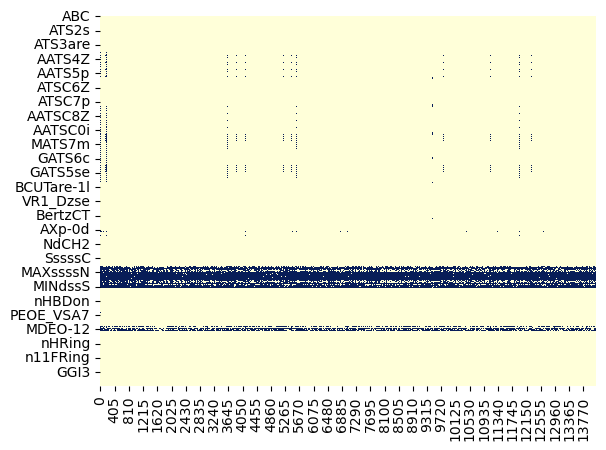

In [32]:
molecules_features_no_low_var[molecules_features_no_low_var.isnull().any(axis=1)]
print(f'There are {molecules_features_no_low_var[molecules_features_no_low_var.isnull().any(axis=1)].shape[0]} rows with at least one NaN value.')
g = sns.heatmap(molecules_features_no_low_var.isna().transpose(), cmap="YlGnBu", cbar=False)

## Dropping all Columns That Are Mainly NaN

We can see from the heatmap that some columns are mostly filled by nan values. These columns are useless to us, and should be deleted. We will drop all columns that are 50% filled by NaN values.

In [30]:
def drop_columns_with_high_nan_count(df: pd.DataFrame, fraction: float):
    threshold = df.shape[0] * fraction
    columns = []
    for column in df.columns:
        if df[column].isna().sum() >= threshold:
            columns.append(column)
    return df.drop(columns, axis=1)

In [33]:
molecules_features_low_nan_columns = drop_columns_with_high_nan_count(df=molecules_features_no_low_var, fraction=0.5)
print(molecules_features_low_nan_columns.shape)
molecules_features_low_nan_columns.head()

(14141, 1349)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-1.415101,-1.449989,-0.531486,1.268375,-1.443526,-6.484916,-6.879167,-1.443526,-6.352342,-3.936238,...,-6.431158,-1.998821,-1.346452,-0.951866,-0.023724,-1.496346,-1.490716,-1.559075,-0.977841,-1.291501
1,-1.378743,-1.381533,-0.531486,-0.523323,-1.377322,-5.416825,-5.701894,-1.377322,-3.417756,-3.503251,...,-5.393281,-1.883933,-1.295415,-0.323884,-0.023724,-1.438904,-1.453218,-1.517895,-0.951993,-1.224600
2,-1.378743,-1.381533,-0.531486,-0.523323,-1.377322,-5.416825,-5.701894,-1.377322,-3.417756,-3.503251,...,-5.393281,-1.883933,-1.292238,0.305429,-0.023724,-1.438904,-1.453218,-1.517895,-0.951993,-1.224600
3,-1.435063,-1.458740,-0.531486,0.073910,-1.405654,-7.537394,-8.039230,-1.405654,-2.226014,-3.977844,...,-7.522116,-2.068012,-1.289036,-0.657433,-0.023724,-1.467625,-1.509465,-1.567311,-1.041026,-1.241325
4,-1.415101,-1.449989,-0.531486,-0.523323,-1.443526,-6.484916,-6.879167,-1.443526,-6.352342,-3.936238,...,-6.431158,-1.998821,-1.285894,-0.125154,-0.023724,-1.496346,-1.490716,-1.559075,-0.977841,-1.291501


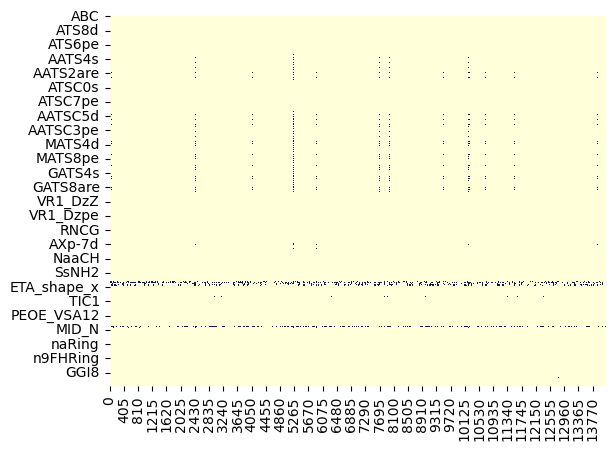

In [34]:
g = sns.heatmap(molecules_features_low_nan_columns.isna().transpose(), cmap="YlGnBu", cbar=False)

## k-Nearest Neighbor (Imputation of NaN values)

KNN imputation is effective for certain situations:

- Good for continuous numerical data with unpredictable missing values.
- Suitable when similar data points share similar values and there's a clear data structure.
- Works well for small to medium-sized datasets with manageable computational cost.
- Captures complex relationships with multiple features.
- Doesn't assume linearity and handles outliers.
  
However, KNN may not be ideal:

- In high-dimensional data due to the "curse of dimensionality."
- With highly sparse data, leading to unreliable imputations.
- For large datasets due to computational intensity.
- For categorical data (better for numerical data).
- In imbalanced datasets favoring majority class imputations.

Before using KNN, explore data and compare with other imputation methods for best performance.

Source: ChatGPT

It's important to note that, even though KNN seems very good for this situation, High Dimensionality is a problem here.

In [35]:
print(f"Number of Nan values: {molecules_features_low_nan_columns.isna().sum().sum()}")

Number of Nan values: 130202


In [36]:
selector = KNNImputer(n_neighbors=5)
molecules_features_fill_na = selector.fit_transform(molecules_features_low_nan_columns)

In [37]:
molecules_features_no_na = pd.DataFrame(molecules_features_fill_na, columns=molecules_features_low_nan_columns.columns)
print(molecules_features_no_na.shape)
molecules_features_no_na.head()

(14141, 1349)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-1.415101,-1.449989,-0.531486,1.268375,-1.443526,-6.484916,-6.879167,-1.443526,-6.352342,-3.936238,...,-6.431158,-1.998821,-1.346452,-0.951866,-0.023724,-1.496346,-1.490716,-1.559075,-0.977841,-1.291501
1,-1.378743,-1.381533,-0.531486,-0.523323,-1.377322,-5.416825,-5.701894,-1.377322,-3.417756,-3.503251,...,-5.393281,-1.883933,-1.295415,-0.323884,-0.023724,-1.438904,-1.453218,-1.517895,-0.951993,-1.224600
2,-1.378743,-1.381533,-0.531486,-0.523323,-1.377322,-5.416825,-5.701894,-1.377322,-3.417756,-3.503251,...,-5.393281,-1.883933,-1.292238,0.305429,-0.023724,-1.438904,-1.453218,-1.517895,-0.951993,-1.224600
3,-1.435063,-1.458740,-0.531486,0.073910,-1.405654,-7.537394,-8.039230,-1.405654,-2.226014,-3.977844,...,-7.522116,-2.068012,-1.289036,-0.657433,-0.023724,-1.467625,-1.509465,-1.567311,-1.041026,-1.241325
4,-1.415101,-1.449989,-0.531486,-0.523323,-1.443526,-6.484916,-6.879167,-1.443526,-6.352342,-3.936238,...,-6.431158,-1.998821,-1.285894,-0.125154,-0.023724,-1.496346,-1.490716,-1.559075,-0.977841,-1.291501


Number of Nan values: 0


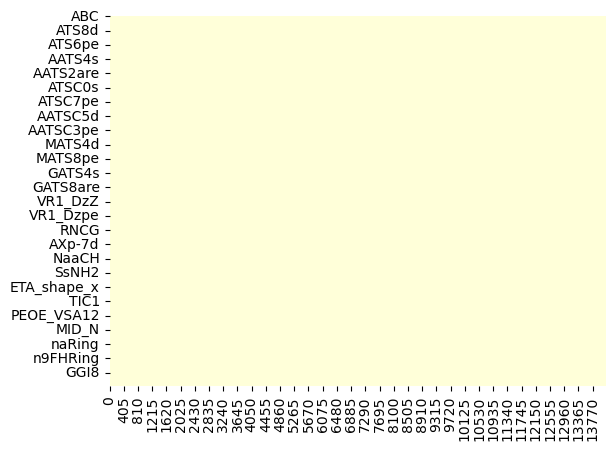

In [39]:
print(f"Number of Nan values: {molecules_features_no_na.isna().sum().sum()}")
g = sns.heatmap(molecules_features_no_na.isna().transpose(), cmap="YlGnBu", cbar=False)

## Descale the Data

Now, we need to restore the data to the way it way before scaling. We do this fo rtwo reasons:

1. Some models need to be calculated on scaled data, some can't be.

2. For the models that need to use scaled data, the scaling process needs to be done separatly for the training and the testing datasets.

For descaling, it's essential to utilize the identical scaler object employed for the initial data scaling. However, the scaler object was originally fitted to the complete dataset, and along the notebook, several columns from that dataset were removed. We'll craft a provisional dataset that retains the original data but only has the selected columns. This new dataset will be scaled using a new scaler object, enabling us to accurately descale the data.


In [42]:
# creating temporary dataset
drugs_scaler = molecules_features[molecules_features_no_na.columns].copy()
drugs_scaler.shape

(14141, 1349)

In [43]:
# fitting the scaler object to the temporary dataset
descaler = StandardScaler()
_ = descaler.fit_transform(drugs_scaler)

In [44]:
# descaling
molecules_features_descaled = descaler.inverse_transform(molecules_features_no_na)
molecules_features_descaled = pd.DataFrame(molecules_features_descaled, columns=molecules_features_no_na.columns)

print(molecules_features_descaled.shape)
molecules_features_descaled.head()

(14141, 1349)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,2.449490,2.449490,0.0,3.000000e+00,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,59.048347,6.560927,9.0,0.0,12.0,9.0,3.111111,1.000000
1,3.047207,3.305183,0.0,-1.110223e-16,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,75.032028,7.503203,18.0,2.0,16.0,14.0,3.361111,1.333333
2,3.047207,3.305183,0.0,-1.110223e-16,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,76.027277,8.447475,18.0,2.0,16.0,14.0,3.361111,1.333333
3,2.121320,2.340100,0.0,1.000000e+00,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,77.029920,7.002720,10.0,1.0,10.0,8.0,2.500000,1.250000
4,2.449490,2.449490,0.0,-1.110223e-16,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,78.013936,7.801394,9.0,0.0,12.0,9.0,3.111111,1.000000


Here we can compare a few columns of the dataset before the feature selection, and after descaling

In [47]:
molecules_features_descaled[["ABC", "SpMax_A", "WPath", "mZagreb2"]]

,ABC,SpMax_A,WPath,mZagreb2
0,2.449490,1.732051,9.0,1.000000
1,3.047207,1.847759,18.0,1.333333
2,3.047207,1.847759,18.0,1.333333
3,2.121320,1.618034,10.0,1.250000
4,2.449490,1.732051,9.0,1.000000
...,...,...,...,...
14136,50.694836,2.630470,20965.0,13.513889
14137,27.092602,2.483476,3799.0,7.000000
14138,30.411843,2.390637,6700.0,8.944444
14139,26.208040,2.509326,3412.0,7.194444


In [48]:
molecules_features[["ABC", "SpMax_A", "WPath", "mZagreb2"]]

,ABC,SpMax_A,WPath,mZagreb2
0,2.449490,1.732051,9,1.000000
1,3.047207,1.847759,18,1.333333
2,3.047207,1.847759,18,1.333333
3,2.121320,1.618034,10,1.250000
4,2.449490,1.732051,9,1.000000
...,...,...,...,...
12241,50.694836,2.630470,20965,13.513889
12242,27.092602,2.483476,3799,7.000000
12243,30.411843,2.390637,6700,8.944444
12244,26.208040,2.509326,3412,7.194444


## Re-join Info and Features Datasets

In [49]:
molecules_info = molecules_info.reset_index(drop=True)
molecules_features_descaled = molecules_features_descaled.reset_index(drop=True)

In [50]:
molecules_processed = pd.concat([molecules_info, molecules_features_descaled], axis=1)
print(molecules_processed.shape)
molecules_processed.head()

(14141, 1363)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,6.188264,24.179697,59.048347,6.560927,9.0,0.0,12.0,9.0,3.111111,1.000000
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,6.834109,27.254130,75.032028,7.503203,18.0,2.0,16.0,14.0,3.361111,1.333333
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,6.834109,27.254130,76.027277,8.447475,18.0,2.0,16.0,14.0,3.361111,1.333333
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,5.509388,22.328143,77.029920,7.002720,10.0,1.0,10.0,8.0,2.500000,1.250000
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,6.188264,24.179697,78.013936,7.801394,9.0,0.0,12.0,9.0,3.111111,1.000000


## Save Datasets

In [51]:
molecules_processed.to_csv(f"{PATH}/pre_processed_datasets/pre_processed_pdb_mordred_2d.csv" ,index=False)


(1895, 1841)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,6.188264,24.179697,59.048347,6.560927,9,0,12.0,9.0,3.111111,1.000000
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,6.834109,27.254130,75.032028,7.503203,18,2,16.0,14.0,3.361111,1.333333
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,6.834109,27.254130,76.027277,8.447475,18,2,16.0,14.0,3.361111,1.333333
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,5.509388,22.328143,77.029920,7.002720,10,1,10.0,8.0,2.500000,1.250000
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,6.188264,24.179697,78.013936,7.801394,9,0,12.0,9.0,3.111111,1.000000


In [54]:
# saving only the calculated descriptors

flag_columns = [
    "name",
    "chembl_id",
    "clean_smiles",
    "first_approval_year",
    "indication_class",
    "molecule_type",
    "withdrawn_flag",
    "therapeutic_flag",
    "polymer_flag",
    "inorganic_flag",
    "natural_product_flag",
    "parenteral",
    "topical",
    "oral",
    "ROMol",
]

mordred_2d_3d_features = mordred_2d_3d.drop(labels=flag_columns, axis=1)

print(mordred_2d_3d_features.shape)
mordred_2d_3d_features.head()

(1895, 1826)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,2.449490,2.449490,0,3,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,59.048347,6.560927,9,0,12.0,9.0,3.111111,1.000000
1,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,75.032028,7.503203,18,2,16.0,14.0,3.361111,1.333333
2,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,76.027277,8.447475,18,2,16.0,14.0,3.361111,1.333333
3,2.121320,2.340100,0,1,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,77.029920,7.002720,10,1,10.0,8.0,2.500000,1.250000
4,2.449490,2.449490,0,0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,78.013936,7.801394,9,0,12.0,9.0,3.111111,1.000000


In [56]:
print(molecules_features.shape)
molecules_features.head()

(14141, 1611)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,2.449490,2.449490,0,3,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,59.048347,6.560927,9,0,12.0,9.0,3.111111,1.000000
1,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,75.032028,7.503203,18,2,16.0,14.0,3.361111,1.333333
2,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,76.027277,8.447475,18,2,16.0,14.0,3.361111,1.333333
3,2.121320,2.340100,0,1,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,77.029920,7.002720,10,1,10.0,8.0,2.500000,1.250000
4,2.449490,2.449490,0,0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,78.013936,7.801394,9,0,12.0,9.0,3.111111,1.000000


In [58]:
display_non_numeric_values(mordred_2d_3d_features)

Column 'ATS0se': ['71.73774399999999' '85.57842' '81.521076' ... '1757.1744369999997'
 '1818.5892669999996' '2118.1079359999994']
Column 'ATS1se': ['67.70641199999999' '77.11891200000002' '73.55392' ...
 '1748.4718399999995' '1885.8657279999995' '2191.935700000001']
Column 'ATS2se': ['79.629996' '106.88530400000002' '89.398648' ... '3202.990637999999'
 '3358.9924859999996' '3905.188027999998']
Column 'ATS3se': ['82.78847999999999' '107.060544' '92.108736' ... '4602.793097999997'
 '4979.158906' '5535.171248000001']
Column 'ATS4se': ['53.74771200000001' '65.157696' '50.12928' ... '5046.506318000001'
 '5856.3305820000005' '6540.966391999999']
Column 'ATS5se': ['0.0' '20.155392' '13.436928' ... '5380.079506000003' '6567.587452000001'
 '6589.930172']
Column 'ATS6se': ['0.0' '41.850432' '13.436928' ... '5909.8509760000015' '7184.826744'
 '7241.383944000001']
Column 'ATS7se': ['0.0' '6.718464' '26.873856' ... '6756.076894' '7955.895219999999'
 '8011.2967039999985']
Column 'ATS8se': ['0.0' '20

In [59]:
convert_non_numeric_to_nan(mordred_2d_3d_features)

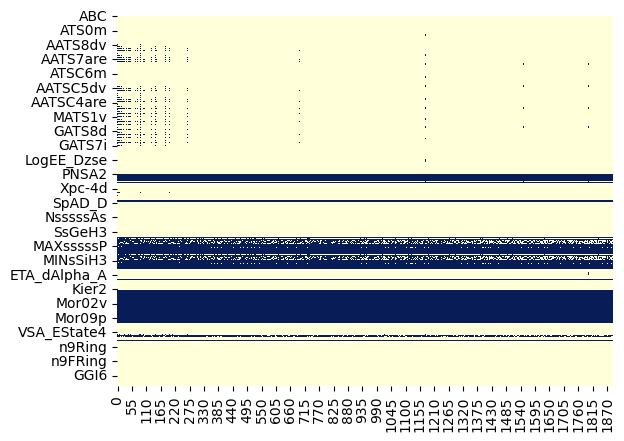

In [60]:
g = sns.heatmap(mordred_2d_3d_features.isna().transpose(), cmap="YlGnBu", cbar=False)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Mordred 2D and 3D

## Reading Datasets

### I will start by importing the fda approved dataset with descriptors, and the pdb dataset with descriptors

In [63]:
PATH = "../../../../../../masters_data"

In [64]:
fda_approved = pd.read_csv(f"{PATH}/positive_datasets/fda_approved_mordred_2d_and_3d.csv", low_memory=False)
print(fda_approved.shape)
fda_approved.head()

(1895, 1841)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,6.188264,24.179697,59.048347,6.560927,9,0,12.0,9.0,3.111111,1.000000
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,6.834109,27.254130,75.032028,7.503203,18,2,16.0,14.0,3.361111,1.333333
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,6.834109,27.254130,76.027277,8.447475,18,2,16.0,14.0,3.361111,1.333333
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,5.509388,22.328143,77.029920,7.002720,10,1,10.0,8.0,2.500000,1.250000
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,6.188264,24.179697,78.013936,7.801394,9,0,12.0,9.0,3.111111,1.000000


In [66]:
pdb = pd.read_csv(f"{PATH}/negative_datasets/pdb_mordred_2d_and_3d.csv", low_memory=False)
print(pdb.shape)
pdb.head()

(12246, 1828)


,clean_smiles,ROMol,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,CC1(C)O[C@H]2[C@@H]3OS(=O)(=O)O[C@@H]3CO[C@@]2...,<rdkit.Chem.rdchem.Mol object at 0x7f900c685eb0>,17.940503,15.438349,0,0,25.870587519755496,2.6106673657802717,5.045479690641752,25.870587519755496,...,10.396628,73.749348,361.013738,9.757128,948,35,130.0,154.0,9.583333,4.222222
1,CNC(=O)c1cccc(C)c1Nc1nc(N2CCN(c3ccccc3Cl)CC2)n...,<rdkit.Chem.rdchem.Mol object at 0x7f900c685cf0>,34.124113,25.848212,0,0,57.57582775168476,2.4615092490485297,4.900216327397796,57.57582775168476,...,10.682973,95.203853,640.209548,8.314410,7108,73,230.0,272.0,14.166667,9.833333
2,CCNC(=O)Nc1cc2c(-c3ccnc(C)c3)ccc(C)c2cn1,<rdkit.Chem.rdchem.Mol object at 0x7f900c685ba0>,18.551185,14.662531,0,0,30.407037312979,2.46696286852779,4.933925737055578,30.407037312979,...,10.097120,58.572801,320.163711,7.276448,1342,38,124.0,145.0,7.888889,5.361111
3,Clc1ccccc1Nc1ccnc(Nc2ccc(-c3nnn[nH]3)cc2)n1,<rdkit.Chem.rdchem.Mol object at 0x7f900c685d60>,20.534606,15.143917,2,0,34.709820028470304,2.348407012232265,4.683189203175339,34.709820028470304,...,10.021226,73.874481,364.095170,9.335774,1938,36,136.0,157.0,6.277778,5.722222
4,CC1=C(CCC(=O)O)c2cc3[nH]c(cc4nc(cc5[nH]c(cc1n2...,<rdkit.Chem.rdchem.Mol object at 0x7f900c685e40>,36.575469,27.294344,4,0,55.26315328576521,2.5471136971911394,4.897978275802004,55.26315328576521,...,10.895646,102.672409,670.140335,8.817636,6789,82,256.0,308.0,19.125000,9.500000


### Now I'll separate the calculated descriptors and the other columns in the datasets

In [68]:
# saving only the calculated descriptors

flag_columns = [
    "name",
    "chembl_id",
    "clean_smiles",
    "first_approval_year",
    "indication_class",
    "molecule_type",
    "withdrawn_flag",
    "therapeutic_flag",
    "polymer_flag",
    "inorganic_flag",
    "natural_product_flag",
    "parenteral",
    "topical",
    "oral",
    "ROMol",
]

fda_approved_features = fda_approved.drop(labels=flag_columns, axis=1)

print(fda_approved_features.shape)
fda_approved_features.head()

(1895, 1826)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,2.449490,2.449490,0,3,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,59.048347,6.560927,9,0,12.0,9.0,3.111111,1.000000
1,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,75.032028,7.503203,18,2,16.0,14.0,3.361111,1.333333
2,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,76.027277,8.447475,18,2,16.0,14.0,3.361111,1.333333
3,2.121320,2.340100,0,1,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,77.029920,7.002720,10,1,10.0,8.0,2.500000,1.250000
4,2.449490,2.449490,0,0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,78.013936,7.801394,9,0,12.0,9.0,3.111111,1.000000


In [69]:
# saving only the information variables (dropping ROMol)

flag_columns = [
    "name",
    "chembl_id",
    "clean_smiles",
    "first_approval_year",
    "indication_class",
    "molecule_type",
    "withdrawn_flag",
    "therapeutic_flag",
    "polymer_flag",
    "inorganic_flag",
    "natural_product_flag",
    "parenteral",
    "topical",
    "oral",
]

fda_approved_info = fda_approved[flag_columns]

print(fda_approved_info.shape)
fda_approved_info.head()

(1895, 14)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,natural_product_flag,parenteral,topical,oral
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,False,False,False,True
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,False,False,False,True
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,False,False,False,True
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,False,False,True,True
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,False,True,False,False


In [70]:
# saving only the calculated descriptors

flag_columns = [
    "clean_smiles",
    "ROMol",
]

pdb_features = pdb.drop(labels=flag_columns, axis=1)

print(pdb_features.shape)
pdb_features.head()

(12246, 1826)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,17.940503,15.438349,0,0,25.870587519755496,2.6106673657802717,5.045479690641752,25.870587519755496,1.1759357963525225,4.055191331332935,...,10.396628,73.749348,361.013738,9.757128,948,35,130.0,154.0,9.583333,4.222222
1,34.124113,25.848212,0,0,57.57582775168476,2.4615092490485297,4.900216327397796,57.57582775168476,1.3085415398110174,4.7077939736304035,...,10.682973,95.203853,640.209548,8.314410,7108,73,230.0,272.0,14.166667,9.833333
2,18.551185,14.662531,0,0,30.407037312979,2.46696286852779,4.933925737055578,30.407037312979,1.2669598880407917,4.103196378002474,...,10.097120,58.572801,320.163711,7.276448,1342,38,124.0,145.0,7.888889,5.361111
3,20.534606,15.143917,2,0,34.709820028470304,2.348407012232265,4.683189203175339,34.709820028470304,1.3349930780180885,4.196462182267038,...,10.021226,73.874481,364.095170,9.335774,1938,36,136.0,157.0,6.277778,5.722222
4,36.575469,27.294344,4,0,55.26315328576521,2.5471136971911394,4.897978275802004,55.26315328576521,1.2013728975166351,4.767289411135039,...,10.895646,102.672409,670.140335,8.817636,6789,82,256.0,308.0,19.125000,9.500000


In [71]:
# saving only the information variables (dropping ROMol)

flag_columns = [
    "clean_smiles"
]

pdb_info = pdb[flag_columns]

print(pdb_info.shape)
pdb_info.head()

(12246, 1)


,clean_smiles
0,CC1(C)O[C@H]2[C@@H]3OS(=O)(=O)O[C@@H]3CO[C@@]2...
1,CNC(=O)c1cccc(C)c1Nc1nc(N2CCN(c3ccccc3Cl)CC2)n...
2,CCNC(=O)Nc1cc2c(-c3ccnc(C)c3)ccc(C)c2cn1
3,Clc1ccccc1Nc1ccnc(Nc2ccc(-c3nnn[nH]3)cc2)n1
4,CC1=C(CCC(=O)O)c2cc3[nH]c(cc4nc(cc5[nH]c(cc1n2...


### Now I'll merge them in one dataset

In [72]:
# merging calculated descriptors

molecules_features = pd.concat([fda_approved_features, pdb_features], axis=0)
print(molecules_features.shape)
molecules_features.head()

(14141, 1826)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,2.449490,2.449490,0,3,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,59.048347,6.560927,9,0,12.0,9.0,3.111111,1.000000
1,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.04525,2.408576,...,6.834109,27.254130,75.032028,7.503203,18,2,16.0,14.0,3.361111,1.333333
2,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.04525,2.408576,...,6.834109,27.254130,76.027277,8.447475,18,2,16.0,14.0,3.361111,1.333333
3,2.121320,2.340100,0,1,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,77.029920,7.002720,10,1,10.0,8.0,2.500000,1.250000
4,2.449490,2.449490,0,0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,78.013936,7.801394,9,0,12.0,9.0,3.111111,1.000000


In [73]:
# merging molecules info

molecules_info = pd.concat([fda_approved_info, pdb_info], axis=0)
print(molecules_info.shape)
molecules_info.head()

(14141, 14)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,natural_product_flag,parenteral,topical,oral
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,False,False,False,True
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,False,False,False,True
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,False,False,False,True
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,False,False,True,True
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,False,True,False,False


## Checking for Non-Numeric Values

In [74]:
def display_non_numeric_values(df):
    non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

    for column in non_numeric_columns:
        unique_values = df[column].unique()
        print(f"Column '{column}': {unique_values}")

In [75]:
display_non_numeric_values(molecules_features)

Column 'SpAbs_A': [3.4641016151377544 5.226251859505506 4.472135954999579 ...
 '50.2670345622672' '43.50858343417583' '20.388609920696577']
Column 'SpMax_A': [1.7320508075688772 1.8477590650225733 1.6180339887498942 ...
 '2.3906374114263933' '2.5093260862181963' '2.3728108640766274']
Column 'SpDiam_A': [3.4641016151377544 3.695518130045147 3.236067977499789 ...
 '4.689623403747479' '4.937863132297458' '4.745621728153257']
Column 'SpAD_A': [3.4641016151377544 5.226251859505506 4.472135954999579 ...
 '50.2670345622672' '43.50858343417583' '20.388609920696577']
Column 'SpMAD_A': [0.8660254037844386 1.0452503719011013 1.118033988749895 ...
 '1.25667586405668' '1.3184419222477526' '1.1327005511498098']
Column 'LogEE_A': [2.1780592999959434 2.408576175098029 2.155908692071148 ...
 '4.462982705863437' '4.444439294621347' '3.7793701806712816']
Column 'VE1_A': [1.9318516525781368 2.130986313697834 1.94649797893546 ...
 '4.19410868637425' '4.651670957129225' '3.631307857336838']
Column 'VE2_A': 

We can see that a lot of the non numeric are float numbers, stored as strings. Let's convert them to float, and the ones that can't be converted to float, will be converted to pd.NaN

In [76]:
def convert_non_numeric_to_nan(df):
    non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

    for column in non_numeric_columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')

In [77]:
convert_non_numeric_to_nan(molecules_features)

In [78]:
display_non_numeric_values(molecules_features)

Column 'Lipinski': [ True False]
Column 'GhoseFilter': [False  True]


We still have the columns Lipinki and Ghose Filter, that are boolean. We will drop those columns

In [79]:
bool_cols_to_drop = ["Lipinski", "GhoseFilter"]
molecules_features = molecules_features.drop(bool_cols_to_drop, axis=1)
display_non_numeric_values(molecules_features)

In [81]:
print(molecules_features.shape)
molecules_features.head()

(14141, 1824)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,2.449490,2.449490,0,3,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,59.048347,6.560927,9,0,12.0,9.0,3.111111,1.000000
1,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,75.032028,7.503203,18,2,16.0,14.0,3.361111,1.333333
2,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,76.027277,8.447475,18,2,16.0,14.0,3.361111,1.333333
3,2.121320,2.340100,0,1,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,77.029920,7.002720,10,1,10.0,8.0,2.500000,1.250000
4,2.449490,2.449490,0,0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,78.013936,7.801394,9,0,12.0,9.0,3.111111,1.000000


## Checking for Infinity Values

### Here, we check for infinity values. If present, we replace them for NaN, to deal with later.

In [82]:
# Count the number of infinity values in the dataset
num_infinity = np.sum(np.isinf(molecules_features))
print(f"Number of Infinity Values (np.inf): {num_infinity.sum()}")

Number of Infinity Values (np.inf): 0


We have no Infinity Values to deal with.

## Scaling the data

### Scaling is necessary so every variable is on the same scale and are comparable to each other. Non-parametric imputation as kNN are very sensible to the scale of the variables, so this is mandatory step.

In [83]:
# scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(molecules_features)

# Merging the column name with the scale data array
molecules_features_scaled = pd.DataFrame(scaled_data, columns=molecules_features.columns)
print(molecules_features_scaled.shape)
molecules_features_scaled.head()

/home/artur/Programs/mambaforge/envs/teachopencadd/lib/python3.8/site-packages/sklearn/utils/extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/artur/Programs/mambaforge/envs/teachopencadd/lib/python3.8/site-packages/sklearn/utils/extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count


(14141, 1824)


/home/artur/Programs/mambaforge/envs/teachopencadd/lib/python3.8/site-packages/sklearn/utils/extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-1.415101,-1.449989,-0.531486,1.268375,-1.443526,-6.484916,-6.879167,-1.443526,-6.352342,-3.936238,...,-6.431158,-1.998821,-1.346452,-0.951866,-0.023724,-1.496346,-1.490716,-1.559075,-0.977841,-1.291501
1,-1.378743,-1.381533,-0.531486,-0.523323,-1.377322,-5.416825,-5.701894,-1.377322,-3.417756,-3.503251,...,-5.393281,-1.883933,-1.295415,-0.323884,-0.023724,-1.438904,-1.453218,-1.517895,-0.951993,-1.224600
2,-1.378743,-1.381533,-0.531486,-0.523323,-1.377322,-5.416825,-5.701894,-1.377322,-3.417756,-3.503251,...,-5.393281,-1.883933,-1.292238,0.305429,-0.023724,-1.438904,-1.453218,-1.517895,-0.951993,-1.224600
3,-1.435063,-1.458740,-0.531486,0.073910,-1.405654,-7.537394,-8.039230,-1.405654,-2.226014,-3.977844,...,-7.522116,-2.068012,-1.289036,-0.657433,-0.023724,-1.467625,-1.509465,-1.567311,-1.041026,-1.241325
4,-1.415101,-1.449989,-0.531486,-0.523323,-1.443526,-6.484916,-6.879167,-1.443526,-6.352342,-3.936238,...,-6.431158,-1.998821,-1.285894,-0.125154,-0.023724,-1.496346,-1.490716,-1.559075,-0.977841,-1.291501


## Zero Variance Filter

### Below is a function that removes columns with variance belowe a threshold. We will use 0 as a threshold, to keep only the molecules with non-zero variance. 

In [84]:
def variance_threshold_selector(data, threshold=0.0):
    """
    Recieves a dataframe and returns the non-zero variance dataframe
    data: scaled dataframe
    threshold: minimum variance
    """
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [85]:
molecules_features_no_low_var = variance_threshold_selector(molecules_features_scaled, threshold=0)
print(molecules_features_no_low_var.shape)
molecules_features_no_low_var.head()

(14141, 1429)


/home/artur/Programs/mambaforge/envs/teachopencadd/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:112: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/artur/Programs/mambaforge/envs/teachopencadd/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:120: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-1.415101,-1.449989,-0.531486,1.268375,-1.443526,-6.484916,-6.879167,-1.443526,-6.352342,-3.936238,...,-6.431158,-1.998821,-1.346452,-0.951866,-0.023724,-1.496346,-1.490716,-1.559075,-0.977841,-1.291501
1,-1.378743,-1.381533,-0.531486,-0.523323,-1.377322,-5.416825,-5.701894,-1.377322,-3.417756,-3.503251,...,-5.393281,-1.883933,-1.295415,-0.323884,-0.023724,-1.438904,-1.453218,-1.517895,-0.951993,-1.224600
2,-1.378743,-1.381533,-0.531486,-0.523323,-1.377322,-5.416825,-5.701894,-1.377322,-3.417756,-3.503251,...,-5.393281,-1.883933,-1.292238,0.305429,-0.023724,-1.438904,-1.453218,-1.517895,-0.951993,-1.224600
3,-1.435063,-1.458740,-0.531486,0.073910,-1.405654,-7.537394,-8.039230,-1.405654,-2.226014,-3.977844,...,-7.522116,-2.068012,-1.289036,-0.657433,-0.023724,-1.467625,-1.509465,-1.567311,-1.041026,-1.241325
4,-1.415101,-1.449989,-0.531486,-0.523323,-1.443526,-6.484916,-6.879167,-1.443526,-6.352342,-3.936238,...,-6.431158,-1.998821,-1.285894,-0.125154,-0.023724,-1.496346,-1.490716,-1.559075,-0.977841,-1.291501


## Checking NaN molecules

In [86]:
print(f"Number of NaN: {molecules_features_no_low_var.isna().sum().sum()}")

Number of NaN: 1117671


There are 14141 rows with at least one NaN value.


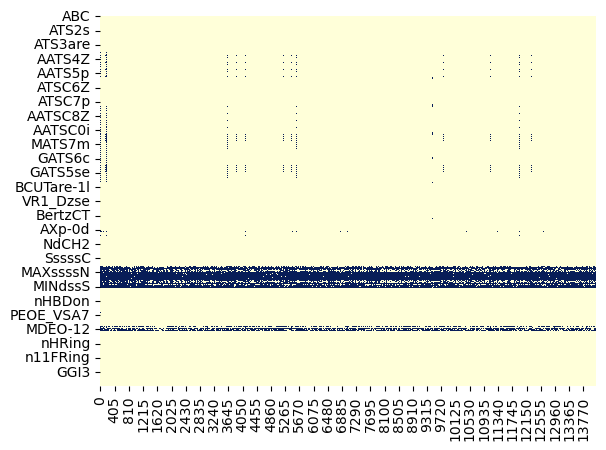

In [87]:
molecules_features_no_low_var[molecules_features_no_low_var.isnull().any(axis=1)]
print(f'There are {molecules_features_no_low_var[molecules_features_no_low_var.isnull().any(axis=1)].shape[0]} rows with at least one NaN value.')
g = sns.heatmap(molecules_features_no_low_var.isna().transpose(), cmap="YlGnBu", cbar=False)

## Dropping all Columns That Are Mainly NaN

We can see from the heatmap that some columns are mostly filled by nan values. These columns are useless to us, and should be deleted. We will drop all columns that are 50% filled by NaN values.

In [88]:
def drop_columns_with_high_nan_count(df: pd.DataFrame, fraction: float):
    threshold = df.shape[0] * fraction
    columns = []
    for column in df.columns:
        if df[column].isna().sum() >= threshold:
            columns.append(column)
    return df.drop(columns, axis=1)

In [89]:
molecules_features_low_nan_columns = drop_columns_with_high_nan_count(df=molecules_features_no_low_var, fraction=0.5)
print(molecules_features_low_nan_columns.shape)
molecules_features_low_nan_columns.head()

(14141, 1349)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-1.415101,-1.449989,-0.531486,1.268375,-1.443526,-6.484916,-6.879167,-1.443526,-6.352342,-3.936238,...,-6.431158,-1.998821,-1.346452,-0.951866,-0.023724,-1.496346,-1.490716,-1.559075,-0.977841,-1.291501
1,-1.378743,-1.381533,-0.531486,-0.523323,-1.377322,-5.416825,-5.701894,-1.377322,-3.417756,-3.503251,...,-5.393281,-1.883933,-1.295415,-0.323884,-0.023724,-1.438904,-1.453218,-1.517895,-0.951993,-1.224600
2,-1.378743,-1.381533,-0.531486,-0.523323,-1.377322,-5.416825,-5.701894,-1.377322,-3.417756,-3.503251,...,-5.393281,-1.883933,-1.292238,0.305429,-0.023724,-1.438904,-1.453218,-1.517895,-0.951993,-1.224600
3,-1.435063,-1.458740,-0.531486,0.073910,-1.405654,-7.537394,-8.039230,-1.405654,-2.226014,-3.977844,...,-7.522116,-2.068012,-1.289036,-0.657433,-0.023724,-1.467625,-1.509465,-1.567311,-1.041026,-1.241325
4,-1.415101,-1.449989,-0.531486,-0.523323,-1.443526,-6.484916,-6.879167,-1.443526,-6.352342,-3.936238,...,-6.431158,-1.998821,-1.285894,-0.125154,-0.023724,-1.496346,-1.490716,-1.559075,-0.977841,-1.291501


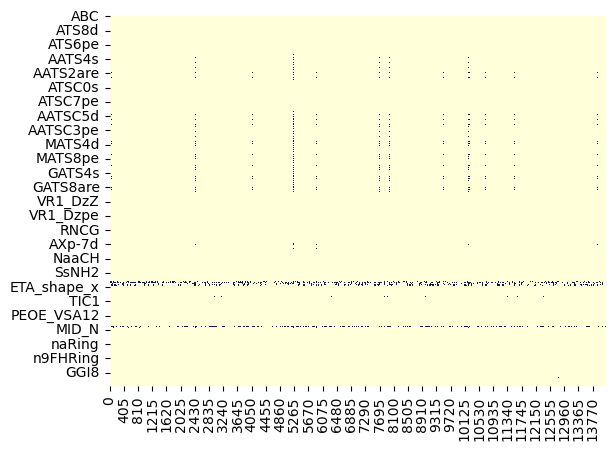

In [90]:
g = sns.heatmap(molecules_features_low_nan_columns.isna().transpose(), cmap="YlGnBu", cbar=False)

## k-Nearest Neighbor (Imputation of NaN values)

KNN imputation is effective for certain situations:

- Good for continuous numerical data with unpredictable missing values.
- Suitable when similar data points share similar values and there's a clear data structure.
- Works well for small to medium-sized datasets with manageable computational cost.
- Captures complex relationships with multiple features.
- Doesn't assume linearity and handles outliers.
  
However, KNN may not be ideal:

- In high-dimensional data due to the "curse of dimensionality."
- With highly sparse data, leading to unreliable imputations.
- For large datasets due to computational intensity.
- For categorical data (better for numerical data).
- In imbalanced datasets favoring majority class imputations.

Before using KNN, explore data and compare with other imputation methods for best performance.

Source: ChatGPT

It's important to note that, even though KNN seems very good for this situation, High Dimensionality is a problem here.

In [91]:
print(f"Number of Nan values: {molecules_features_low_nan_columns.isna().sum().sum()}")

Number of Nan values: 130202


In [92]:
selector = KNNImputer(n_neighbors=5)
molecules_features_fill_na = selector.fit_transform(molecules_features_low_nan_columns)

In [93]:
molecules_features_no_na = pd.DataFrame(molecules_features_fill_na, columns=molecules_features_low_nan_columns.columns)
print(molecules_features_no_na.shape)
molecules_features_no_na.head()

(14141, 1349)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-1.415101,-1.449989,-0.531486,1.268375,-1.443526,-6.484916,-6.879167,-1.443526,-6.352342,-3.936238,...,-6.431158,-1.998821,-1.346452,-0.951866,-0.023724,-1.496346,-1.490716,-1.559075,-0.977841,-1.291501
1,-1.378743,-1.381533,-0.531486,-0.523323,-1.377322,-5.416825,-5.701894,-1.377322,-3.417756,-3.503251,...,-5.393281,-1.883933,-1.295415,-0.323884,-0.023724,-1.438904,-1.453218,-1.517895,-0.951993,-1.224600
2,-1.378743,-1.381533,-0.531486,-0.523323,-1.377322,-5.416825,-5.701894,-1.377322,-3.417756,-3.503251,...,-5.393281,-1.883933,-1.292238,0.305429,-0.023724,-1.438904,-1.453218,-1.517895,-0.951993,-1.224600
3,-1.435063,-1.458740,-0.531486,0.073910,-1.405654,-7.537394,-8.039230,-1.405654,-2.226014,-3.977844,...,-7.522116,-2.068012,-1.289036,-0.657433,-0.023724,-1.467625,-1.509465,-1.567311,-1.041026,-1.241325
4,-1.415101,-1.449989,-0.531486,-0.523323,-1.443526,-6.484916,-6.879167,-1.443526,-6.352342,-3.936238,...,-6.431158,-1.998821,-1.285894,-0.125154,-0.023724,-1.496346,-1.490716,-1.559075,-0.977841,-1.291501


Number of Nan values: 0


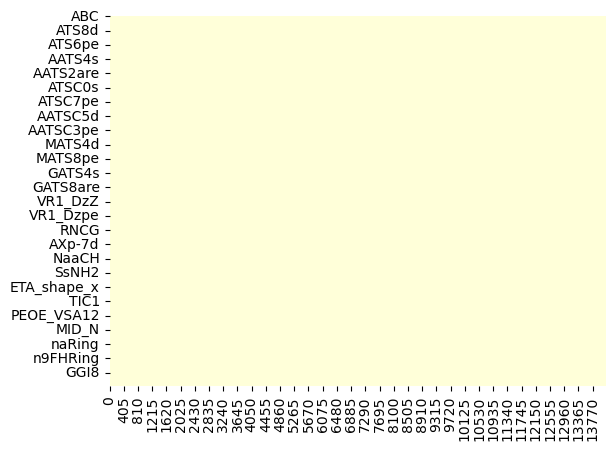

In [94]:
print(f"Number of Nan values: {molecules_features_no_na.isna().sum().sum()}")
g = sns.heatmap(molecules_features_no_na.isna().transpose(), cmap="YlGnBu", cbar=False)

## Descale the Data

Now, we need to restore the data to the way it way before scaling. We do this fo rtwo reasons:

1. Some models need to be calculated on scaled data, some can't be.

2. For the models that need to use scaled data, the scaling process needs to be done separatly for the training and the testing datasets.

For descaling, it's essential to utilize the identical scaler object employed for the initial data scaling. However, the scaler object was originally fitted to the complete dataset, and along the notebook, several columns from that dataset were removed. We'll craft a provisional dataset that retains the original data but only has the selected columns. This new dataset will be scaled using a new scaler object, enabling us to accurately descale the data.


In [95]:
# creating temporary dataset
drugs_scaler = molecules_features[molecules_features_no_na.columns].copy()
drugs_scaler.shape

(14141, 1349)

In [96]:
# fitting the scaler object to the temporary dataset
descaler = StandardScaler()
_ = descaler.fit_transform(drugs_scaler)

In [97]:
# descaling
molecules_features_descaled = descaler.inverse_transform(molecules_features_no_na)
molecules_features_descaled = pd.DataFrame(molecules_features_descaled, columns=molecules_features_no_na.columns)

print(molecules_features_descaled.shape)
molecules_features_descaled.head()

(14141, 1349)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,2.449490,2.449490,0.0,3.000000e+00,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,59.048347,6.560927,9.0,0.0,12.0,9.0,3.111111,1.000000
1,3.047207,3.305183,0.0,-1.110223e-16,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,75.032028,7.503203,18.0,2.0,16.0,14.0,3.361111,1.333333
2,3.047207,3.305183,0.0,-1.110223e-16,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,76.027277,8.447475,18.0,2.0,16.0,14.0,3.361111,1.333333
3,2.121320,2.340100,0.0,1.000000e+00,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,77.029920,7.002720,10.0,1.0,10.0,8.0,2.500000,1.250000
4,2.449490,2.449490,0.0,-1.110223e-16,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,78.013936,7.801394,9.0,0.0,12.0,9.0,3.111111,1.000000


Here we can compare a few columns of the dataset before the feature selection, and after descaling

In [98]:
molecules_features_descaled[["ABC", "SpMax_A", "WPath", "mZagreb2"]]

,ABC,SpMax_A,WPath,mZagreb2
0,2.449490,1.732051,9.0,1.000000
1,3.047207,1.847759,18.0,1.333333
2,3.047207,1.847759,18.0,1.333333
3,2.121320,1.618034,10.0,1.250000
4,2.449490,1.732051,9.0,1.000000
...,...,...,...,...
14136,50.694836,2.630470,20965.0,13.513889
14137,27.092602,2.483476,3799.0,7.000000
14138,30.411843,2.390637,6700.0,8.944444
14139,26.208040,2.509326,3412.0,7.194444


In [99]:
molecules_features[["ABC", "SpMax_A", "WPath", "mZagreb2"]]

,ABC,SpMax_A,WPath,mZagreb2
0,2.449490,1.732051,9,1.000000
1,3.047207,1.847759,18,1.333333
2,3.047207,1.847759,18,1.333333
3,2.121320,1.618034,10,1.250000
4,2.449490,1.732051,9,1.000000
...,...,...,...,...
12241,50.694836,2.630470,20965,13.513889
12242,27.092602,2.483476,3799,7.000000
12243,30.411843,2.390637,6700,8.944444
12244,26.208040,2.509326,3412,7.194444


## Re-join Info and Features Datasets

In [100]:
molecules_info = molecules_info.reset_index(drop=True)
molecules_features_descaled = molecules_features_descaled.reset_index(drop=True)

In [101]:
molecules_processed_3d = pd.concat([molecules_info, molecules_features_descaled], axis=1)
print(molecules_processed_3d.shape)
molecules_processed_3d.head()

(14141, 1363)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,6.188264,24.179697,59.048347,6.560927,9.0,0.0,12.0,9.0,3.111111,1.000000
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,6.834109,27.254130,75.032028,7.503203,18.0,2.0,16.0,14.0,3.361111,1.333333
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,6.834109,27.254130,76.027277,8.447475,18.0,2.0,16.0,14.0,3.361111,1.333333
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,5.509388,22.328143,77.029920,7.002720,10.0,1.0,10.0,8.0,2.500000,1.250000
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,6.188264,24.179697,78.013936,7.801394,9.0,0.0,12.0,9.0,3.111111,1.000000


# Comparing 2D vs 2D and 3D datasets

In [103]:
print(f"2D dataset shape: {molecules_processed.shape}")
print(f"2D and 3D dataset shape: {molecules_processed_3d.shape}")

2D dataset shape: (14141, 1363)
2D and 3D dataset shape: (14141, 1363)


We can see that the shape is exactly the same. Here, I will check if any column in the 2D and 3D dataset is not present in the 2D dataset

In [105]:
for i in molecules_processed_3d.columns:
    if i not in molecules_processed:
        print(i)

Nothing was printed. This means that both datasets have the exact same columns. That means that the 3D dexcriptors were not calculated properly, and were all removed in the pre processing satage. For this reason, I will not save the 2D and 3D dataset.